In [1]:
import pandas as pd 
import numpy as np 
import os 
import re
import sys 
import ast 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 
import statistics 



In [2]:
results_dir = "../../../european-city-data/rag-sustainability/results/results-combined_prompts/"
folders = os.listdir(results_dir)
results_df = pd.read_csv(f"{results_dir}/recommended_cities.csv")
sim_df = pd.read_csv(f"{results_dir}/context_response_similarity_scores.csv")

cities_df = pd.read_csv("../../../european-city-data/cities/worldcities.csv")
cities = list(cities_df['city'])

eucities_df = pd.read_csv("../../../european-city-data/archive/city_abstracts_embeddings.csv")
eu_cities = list(cities_df['city'])

In [3]:
llama = sim_df[sim_df['model'] == 'llama3point1-instruct']
mistral = sim_df[sim_df['model'] == 'mistral-instruct']

In [4]:
def normalize_sim(sim):
    """
    Normalizing the cosine similarity scores:
    0 => opposite similarity 
    0.5 => no relationship 
    1.0 => similar
    """
    return (sim + 1) / 2

# llama['norm_sim'] = llama['context_response_sim'].apply(normalize_sim)
# llama['norm_sim_sus'] = llama['context_response_sim_sustainable'].apply(normalize_sim)
# mistral['norm_sim'] = mistral['context_response_sim'].apply(normalize_sim)
# mistral['norm_sim_sus'] = mistral['context_response_sim_sustainable'].apply(normalize_sim)

In [5]:
llama.head()

,model,prompt_id,context_response_sim,context_response_sim_sustainable
0,llama3point1-instruct,prompt_17_gemini-ui,0.198,0.136
1,llama3point1-instruct,prompt_27_gemini-1.5-pro-001,0.123,0.158
2,llama3point1-instruct,prompt_42_gpt-4o-mini,0.071,0.209
3,llama3point1-instruct,prompt_0_gpt-4o-mini,0.252,0.178
4,llama3point1-instruct,prompt_44_gemini-1.5-pro-001,0.105,0.086


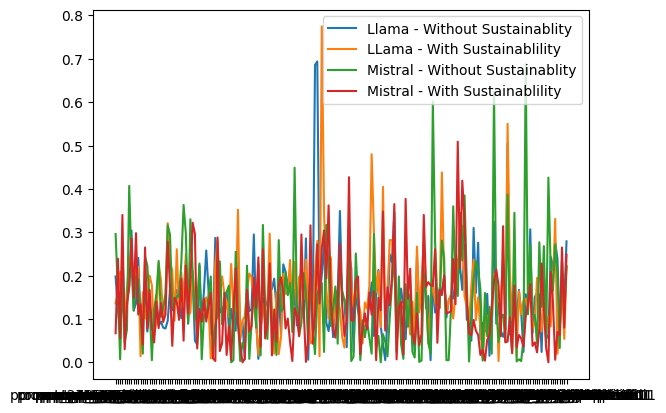

In [6]:
fig, ax = plt.subplots()

ax.plot(llama['prompt_id'], llama['context_response_sim'], label="Llama - Without Sustainablity")
ax.plot(llama['prompt_id'], llama['context_response_sim_sustainable'], label="LLama - With Sustainablility")
ax.plot(mistral['prompt_id'], mistral['context_response_sim'], label="Mistral - Without Sustainablity")
ax.plot(mistral['prompt_id'], mistral['context_response_sim_sustainable'], label="Mistral - With Sustainablility")
ax.legend()

plt.show()

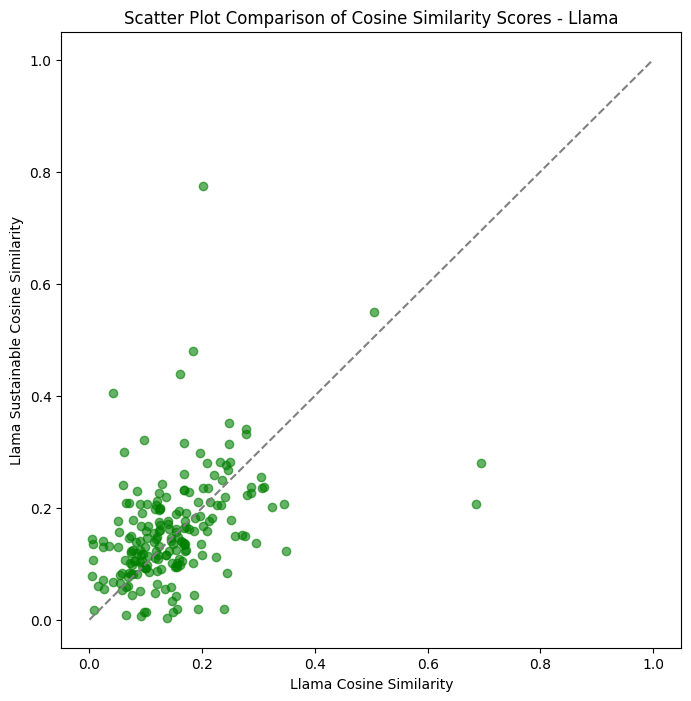

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(llama['context_response_sim'], llama['context_response_sim_sustainable'], alpha=0.6, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Add y=x line
plt.title('Scatter Plot Comparison of Cosine Similarity Scores - Llama')
plt.xlabel('Llama Cosine Similarity')
plt.ylabel('Llama Sustainable Cosine Similarity')
plt.show()

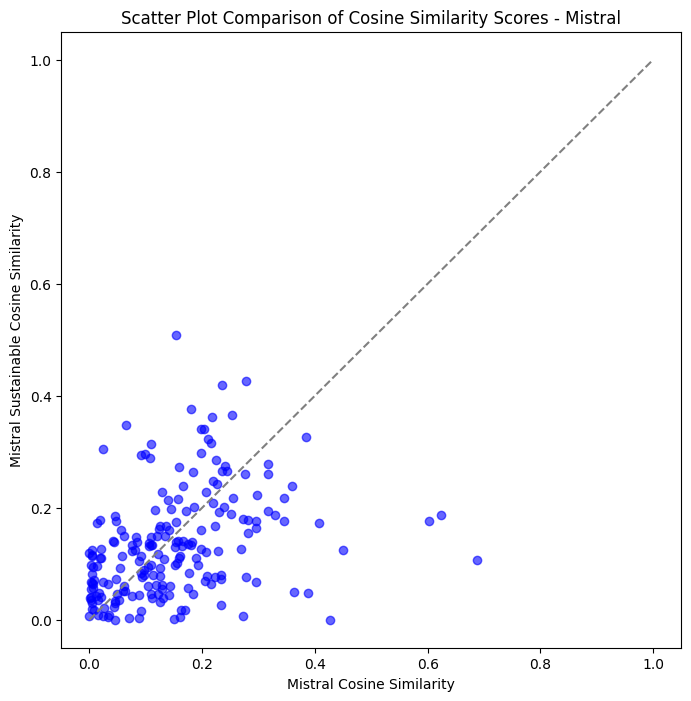

In [8]:
plt.figure(figsize=(8, 8))
plt.scatter(mistral['context_response_sim'], mistral['context_response_sim_sustainable'], alpha=0.6, color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Add y=x line
plt.title('Scatter Plot Comparison of Cosine Similarity Scores - Mistral')
plt.xlabel('Mistral Cosine Similarity')
plt.ylabel('Mistral Sustainable Cosine Similarity')
plt.show()

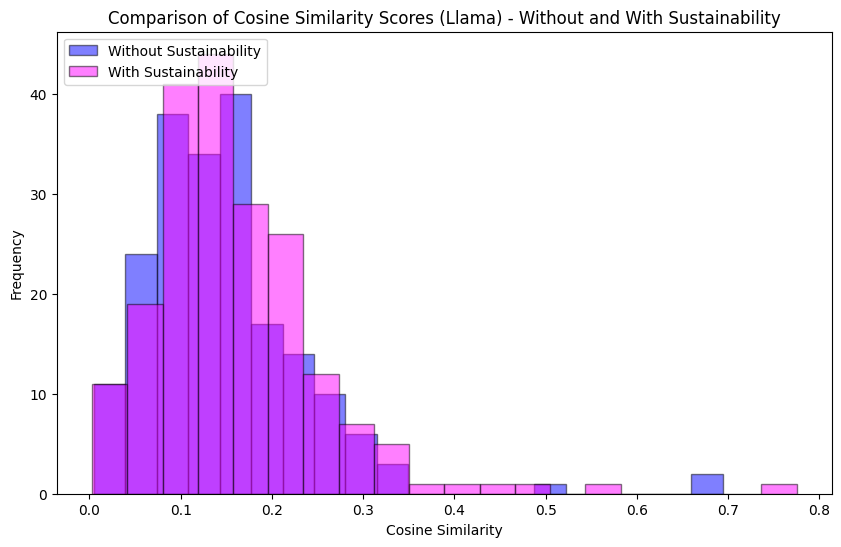

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(llama['context_response_sim'], bins=20, alpha=0.5, label='Without Sustainability', color='blue', edgecolor='black')
plt.hist(llama['context_response_sim_sustainable'], bins=20, alpha=0.5, label='With Sustainability', color='magenta', edgecolor='black')
plt.title('Comparison of Cosine Similarity Scores (Llama) - Without and With Sustainability')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

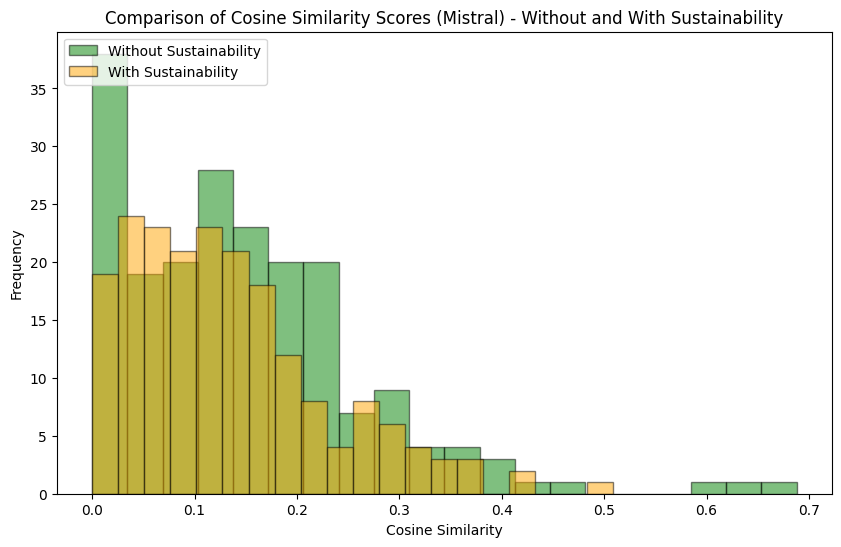

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(mistral['context_response_sim'], bins=20, alpha=0.5, label='Without Sustainability', color='green', edgecolor='black')
plt.hist(mistral['context_response_sim_sustainable'], bins=20, alpha=0.5, label='With Sustainability', color='orange', edgecolor='black')
plt.title('Comparison of Cosine Similarity Scores (Mistral) - Without and With Sustainability')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

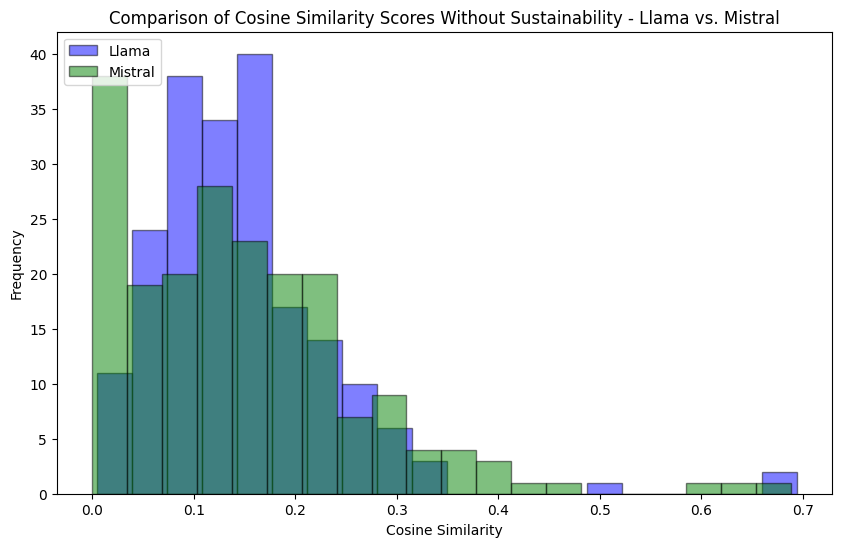

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(llama['context_response_sim'], bins=20, alpha=0.5, label='Llama', color='blue', edgecolor='black')
plt.hist(mistral['context_response_sim'], bins=20, alpha=0.5, label='Mistral', color='green', edgecolor='black')
plt.title('Comparison of Cosine Similarity Scores Without Sustainability - Llama vs. Mistral')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

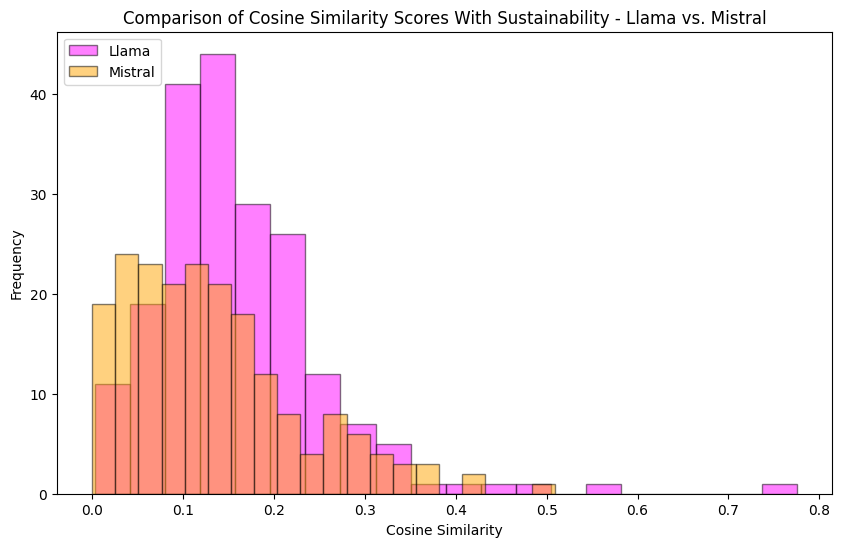

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(llama['context_response_sim_sustainable'], bins=20, alpha=0.5, label='Llama', color='magenta', edgecolor='black')
plt.hist(mistral['context_response_sim_sustainable'], bins=20, alpha=0.5, label='Mistral', color='orange', edgecolor='black')
plt.title('Comparison of Cosine Similarity Scores With Sustainability - Llama vs. Mistral')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

/var/folders/07/81pmlyln5szbq49h1zdqjq1h0000gn/T/ipykernel_14417/736070723.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(llama['context_response_sim'], shade=True, color="blue", label='Llama')
/var/folders/07/81pmlyln5szbq49h1zdqjq1h0000gn/T/ipykernel_14417/736070723.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mistral['context_response_sim'], shade=True, color="green", label='Mistral')


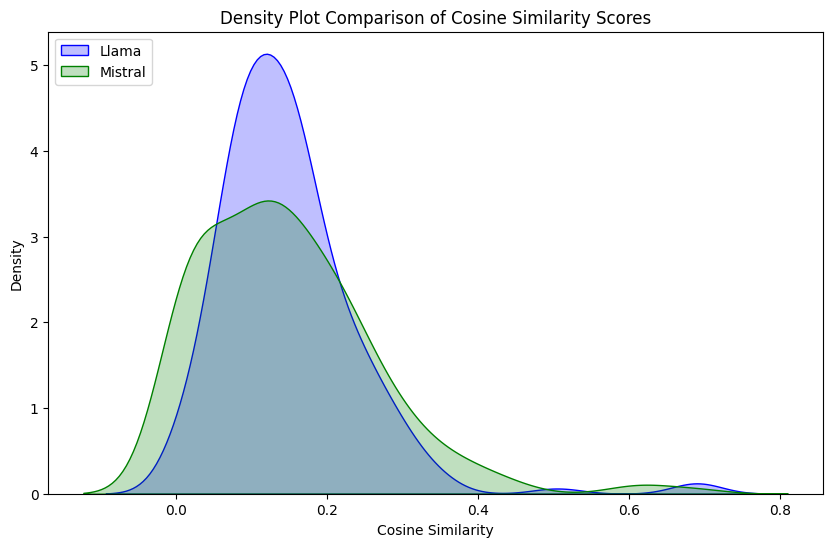

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(llama['context_response_sim'], shade=True, color="blue", label='Llama')
sns.kdeplot(mistral['context_response_sim'], shade=True, color="green", label='Mistral')
plt.title('Density Plot Comparison of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

/var/folders/07/81pmlyln5szbq49h1zdqjq1h0000gn/T/ipykernel_14417/2929915140.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(llama['context_response_sim_sustainable'], shade=True, color="magenta", label='Llama')
/var/folders/07/81pmlyln5szbq49h1zdqjq1h0000gn/T/ipykernel_14417/2929915140.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mistral['context_response_sim_sustainable'], shade=True, color="orange", label='Mistral')


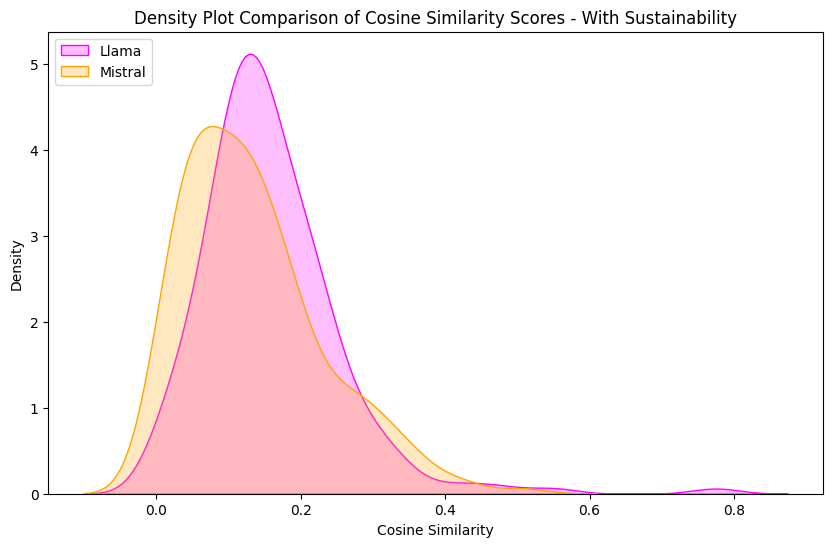

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(llama['context_response_sim_sustainable'], shade=True, color="magenta", label='Llama')
sns.kdeplot(mistral['context_response_sim_sustainable'], shade=True, color="orange", label='Mistral')
plt.title('Density Plot Comparison of Cosine Similarity Scores - With Sustainability')
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

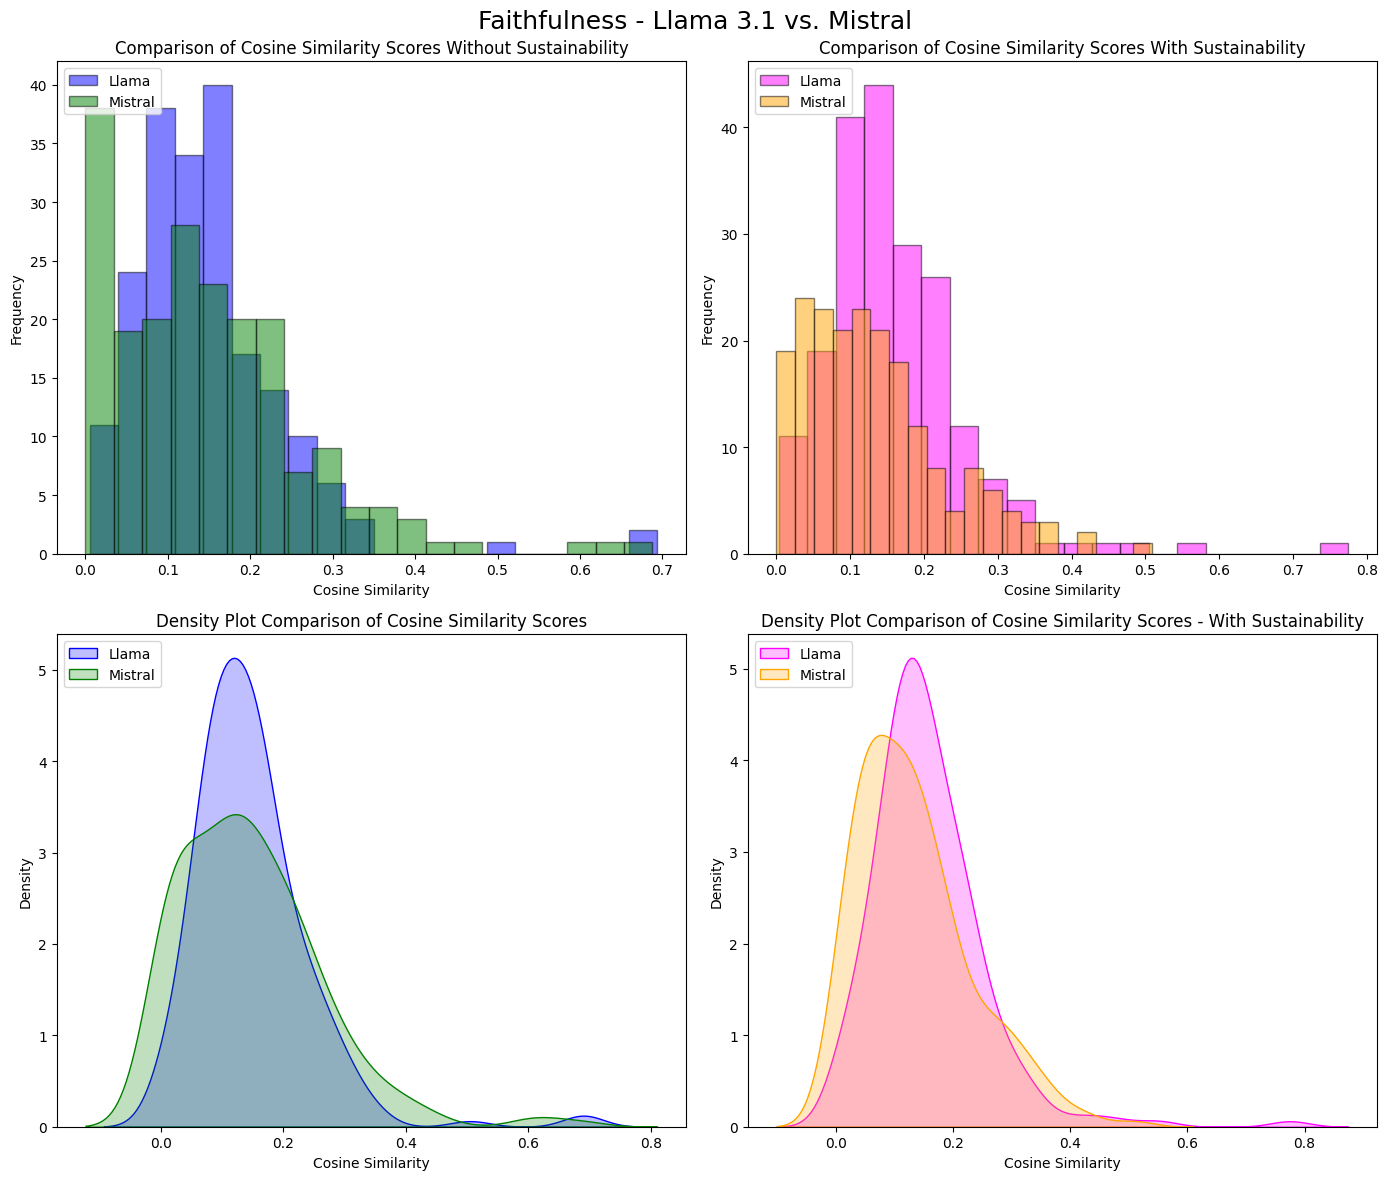

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plt.suptitle("Faithfulness - Llama 3.1 vs. Mistral", fontsize=18)

# Histogram w/o sustainability
axes[0,0].hist(llama['context_response_sim'], bins=20, alpha=0.5, label='Llama', color='blue', edgecolor='black')
axes[0,0].hist(mistral['context_response_sim'], bins=20, alpha=0.5, label='Mistral', color='green', edgecolor='black')
axes[0,0].set_title('Comparison of Cosine Similarity Scores Without Sustainability')
axes[0,0].set_xlabel('Cosine Similarity')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend(loc='upper left')

# Histogram with sustainability
axes[0,1].hist(llama['context_response_sim_sustainable'], bins=20, alpha=0.5, label='Llama', color='magenta', edgecolor='black')
axes[0,1].hist(mistral['context_response_sim_sustainable'], bins=20, alpha=0.5, label='Mistral', color='orange', edgecolor='black')
axes[0,1].set_title('Comparison of Cosine Similarity Scores With Sustainability')
axes[0,1].set_xlabel('Cosine Similarity')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend(loc='upper left')

# KDE w/o sustainability 
sns.kdeplot(llama['context_response_sim'], fill=True, color="blue", label='Llama', ax=axes[1,0])
sns.kdeplot(mistral['context_response_sim'], fill=True, color="green", label='Mistral', ax=axes[1,0])
axes[1,0].set_title('Density Plot Comparison of Cosine Similarity Scores')
axes[1,0].set_xlabel('Cosine Similarity')
axes[1,0].set_ylabel('Density')
axes[1,0].legend(loc='upper left')

# KDE with sustainability
sns.kdeplot(llama['context_response_sim_sustainable'], fill=True, color="magenta", label='Llama', ax=axes[1,1])
sns.kdeplot(mistral['context_response_sim_sustainable'], fill=True, color="orange", label='Mistral', ax=axes[1,1])
axes[1,1].set_title('Density Plot Comparison of Cosine Similarity Scores - With Sustainability')
axes[1,1].set_xlabel('Cosine Similarity')
axes[1,1].set_ylabel('Density')
axes[1,1].legend(loc='upper left')

plt.tight_layout()
plt.savefig("faithfulness.pdf", format='pdf')
plt.show()

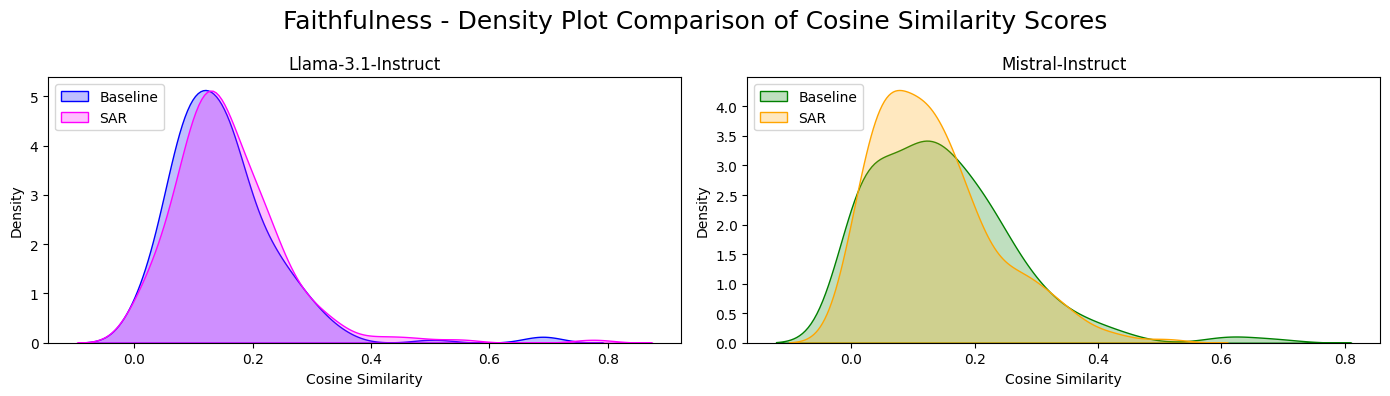

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plt.suptitle("Faithfulness - Density Plot Comparison of Cosine Similarity Scores", fontsize=18)

# KDE w/o sustainability 
sns.kdeplot(llama['context_response_sim'], fill=True, color="blue", label='Baseline', ax=axes[0])
# sns.kdeplot(mistral['context_response_sim'], fill=True, color="green", label='Mistral', ax=axes[1,0])
sns.kdeplot(llama['context_response_sim_sustainable'], fill=True, color="magenta", label='SAR', ax=axes[0])
axes[0].set_title('Llama-3.1-Instruct')
axes[0].set_xlabel('Cosine Similarity')
axes[0].set_ylabel('Density')
axes[0].legend(loc='upper left')

# KDE with sustainability
# sns.kdeplot(llama['context_response_sim_sustainable'], fill=True, color="magenta", label='Llama', ax=axes[1,1])
sns.kdeplot(mistral['context_response_sim'], fill=True, color="green", label='Baseline', ax=axes[1])
sns.kdeplot(mistral['context_response_sim_sustainable'], fill=True, color="orange", label='SAR', ax=axes[1])
axes[1].set_title('Mistral-Instruct')
axes[1].set_xlabel('Cosine Similarity')
axes[1].set_ylabel('Density')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.savefig("faithfulness_kde.pdf", format='pdf')
plt.show()

In [18]:
llama_baseline_stats = [llama['context_response_sim'].mean(), llama['context_response_sim'].std()]
llama_sar_stats = [llama['context_response_sim_sustainable'].mean(), llama['context_response_sim_sustainable'].std()]
print(f"Llama Baseline: {llama_baseline_stats}")
print(f"Llama SAR: {llama_sar_stats}")

mistral_baseline_stats = [mistral['context_response_sim'].mean(), mistral['context_response_sim'].std()]
mistral_sar_stats = [mistral['context_response_sim_sustainable'].mean(), mistral['context_response_sim_sustainable'].std()]
print(f"Mistral: Baseline: {mistral_baseline_stats}")
print(f"Mistral: SAR: {mistral_sar_stats}")

Llama Baseline: [0.148335, 0.09413821109913191]
Llama SAR: [0.157505, 0.09588723472871453]
Mistral: Baseline: [0.147325, 0.11778363339820357]
Mistral: SAR: [0.133895, 0.0973967381280808]
